In [1]:
import pandas as pd
import numpy as np

In [2]:
match = pd.read_csv("matches.csv")
delivery = pd.read_csv('deliveries.csv')

In [3]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [5]:
total_score = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [6]:
total_score_df = total_score[total_score['inning'] == 1]

In [7]:
total_score_df

,match_id,inning,total_runs
0,1,1,207.0
2,2,1,184.0
4,3,1,183.0
6,4,1,163.0
8,5,1,157.0
...,...,...,...
432,214,1,184.0
434,215,1,154.0
436,216,1,138.0
438,217,1,160.0


In [8]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [9]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207.0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184.0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183.0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,214,IPL-2010,Bangalore,08-04-2010,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,7,TL Suman,M Chinnaswamy Stadium,S Asnani,DJ Harper,NaN,214,184.0
214,215,IPL-2010,Chandigarh,09-04-2010,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Kings XI Punjab,0,6,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",M Erasmus,AM Saheba,NaN,215,154.0
215,216,IPL-2010,Nagpur,10-04-2010,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,normal,0,Deccan Chargers,0,6,RJ Harris,"Vidarbha Cricket Association Stadium, Jamtha",HDPK Dharmasena,SJA Taufel,NaN,216,138.0
216,217,IPL-2010,Bangalore,10-04-2010,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,R Vinay Kumar,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN,217,160.0


In [10]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers'],
      dtype=object)

In [11]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [12]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [13]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [14]:
match_df.shape


(190, 20)

In [15]:
match_df = match_df[match_df['dl_applied'] == 0]

In [16]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157.0
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178.0
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148.0
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,214,IPL-2010,Bangalore,08-04-2010,Royal Challengers Bangalore,Sunrisers Hyderabad,Deccan Chargers,field,normal,0,Deccan Chargers,0,7,TL Suman,M Chinnaswamy Stadium,S Asnani,DJ Harper,NaN,214,184.0
214,215,IPL-2010,Chandigarh,09-04-2010,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Kings XI Punjab,0,6,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",M Erasmus,AM Saheba,NaN,215,154.0
215,216,IPL-2010,Nagpur,10-04-2010,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,normal,0,Deccan Chargers,0,6,RJ Harris,"Vidarbha Cricket Association Stadium, Jamtha",HDPK Dharmasena,SJA Taufel,NaN,216,138.0
216,217,IPL-2010,Bangalore,10-04-2010,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,R Vinay Kumar,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN,217,160.0


In [17]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [18]:
delivery_df = match_df.merge(delivery,on='match_id')

In [19]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43993,218,Delhi,Kings XI Punjab,111.0,2,Kings XI Punjab,Delhi Daredevils,15,4,Yuvraj Singh,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
43994,218,Delhi,Kings XI Punjab,111.0,2,Kings XI Punjab,Delhi Daredevils,15,5,KC Sangakkara,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
43995,218,Delhi,Kings XI Punjab,111.0,2,Kings XI Punjab,Delhi Daredevils,15,6,Yuvraj Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
43996,218,Delhi,Kings XI Punjab,111.0,2,Kings XI Punjab,Delhi Daredevils,16,1,KC Sangakkara,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [20]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [21]:
delivery_df.shape

(21166, 24)

In [22]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

<ipython-input-22-217bd3ae9237>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()


In [23]:
delivery_df['runs_left'] = (delivery_df['total_runs_x'] - delivery_df['current_score']) + 1

<ipython-input-23-54a54a28ed17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['runs_left'] = (delivery_df['total_runs_x'] - delivery_df['current_score']) + 1


In [24]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,207.0
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,207.0
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,207.0
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN,3.0,205.0
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN,7.0,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43993,218,Delhi,Kings XI Punjab,111.0,2,Kings XI Punjab,Delhi Daredevils,15,4,Yuvraj Singh,...,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,87.0,25.0
43994,218,Delhi,Kings XI Punjab,111.0,2,Kings XI Punjab,Delhi Daredevils,15,5,KC Sangakkara,...,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,88.0,24.0
43995,218,Delhi,Kings XI Punjab,111.0,2,Kings XI Punjab,Delhi Daredevils,15,6,Yuvraj Singh,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,88.0,24.0
43996,218,Delhi,Kings XI Punjab,111.0,2,Kings XI Punjab,Delhi Daredevils,16,1,KC Sangakkara,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,88.0,24.0


In [25]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

<ipython-input-25-7447ac93ecae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])


In [26]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,207.0,119
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,207.0,118
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,207.0,117
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0.0,2.0,0.0,2.0,NaN,NaN,NaN,3.0,205.0,116
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0.0,4.0,0.0,4.0,NaN,NaN,NaN,7.0,201.0,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43993,218,Delhi,Kings XI Punjab,111.0,2,Kings XI Punjab,Delhi Daredevils,15,4,Yuvraj Singh,...,0.0,0.0,1.0,1.0,NaN,NaN,NaN,87.0,25.0,32
43994,218,Delhi,Kings XI Punjab,111.0,2,Kings XI Punjab,Delhi Daredevils,15,5,KC Sangakkara,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,88.0,24.0,31
43995,218,Delhi,Kings XI Punjab,111.0,2,Kings XI Punjab,Delhi Daredevils,15,6,Yuvraj Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,88.0,24.0,30
43996,218,Delhi,Kings XI Punjab,111.0,2,Kings XI Punjab,Delhi Daredevils,16,1,KC Sangakkara,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,88.0,24.0,29


In [27]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder', 'current_score',
       'runs_left', 'balls_left'],
      dtype='object')

In [28]:
delivery_df.iloc[0,21]

nan

In [29]:
delivery_df['player_dismissed'].astype(str)

,player_dismissed
125,nan
126,nan
127,nan
128,nan
129,nan
...,...
43993,nan
43994,nan
43995,nan
43996,nan


In [30]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna('0')
delivery_df['player_dismissed']

<ipython-input-30-7f24755a9daa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna('0')


,player_dismissed
125,0
126,0
127,0
128,0
129,0
...,...
43993,0
43994,0
43995,0
43996,0


In [31]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == '0' else '1')
delivery_df['player_dismissed']

<ipython-input-31-40b45f922384>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == '0' else '1')


,player_dismissed
125,0
126,0
127,0
128,0
129,0
...,...
43993,0
43994,0
43995,0
43996,0


In [32]:
delivery_df['player_dismissed'].astype(int)

,player_dismissed
125,0
126,0
127,0
128,0
129,0
...,...
43993,0
43994,0
43995,0
43996,0


In [33]:
delivery_df['player_dismissed'] = pd.to_numeric(delivery_df['player_dismissed'])

wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets_left'] = 10 - wickets

delivery_df.head()

<ipython-input-33-3cfde9dde4d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = pd.to_numeric(delivery_df['player_dismissed'])
<ipython-input-33-3cfde9dde4d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['wickets_left'] = 10 - wickets


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1.0,0.0,1.0,0,NaN,NaN,1.0,207.0,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,207.0,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,207.0,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2.0,0.0,2.0,0,NaN,NaN,3.0,205.0,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4.0,0.0,4.0,0,NaN,NaN,7.0,201.0,115,10


In [34]:
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
43993,218,Delhi,Kings XI Punjab,111.0,2,Kings XI Punjab,Delhi Daredevils,15,4,Yuvraj Singh,...,0.0,1.0,1.0,0,NaN,NaN,87.0,25.0,32,8
43994,218,Delhi,Kings XI Punjab,111.0,2,Kings XI Punjab,Delhi Daredevils,15,5,KC Sangakkara,...,1.0,0.0,1.0,0,NaN,NaN,88.0,24.0,31,8
43995,218,Delhi,Kings XI Punjab,111.0,2,Kings XI Punjab,Delhi Daredevils,15,6,Yuvraj Singh,...,0.0,0.0,0.0,0,NaN,NaN,88.0,24.0,30,8
43996,218,Delhi,Kings XI Punjab,111.0,2,Kings XI Punjab,Delhi Daredevils,16,1,KC Sangakkara,...,0.0,0.0,0.0,0,NaN,NaN,88.0,24.0,29,8
43997,218,Delhi,Kings XI Punjab,111.0,2,Kings XI Punjab,Delhi Daredevils,16,2,KC Sangakkara,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,28,8


In [35]:
delivery_df['crr'] = (delivery_df['current_score']*6)  /(120 - delivery_df['balls_left'])

<ipython-input-35-7d45fc1e03ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['crr'] = (delivery_df['current_score']*6)  /(120 - delivery_df['balls_left'])


In [36]:
delivery_df['crr']

,crr
125,6.000000
126,3.000000
127,2.000000
128,4.500000
129,8.400000
...,...
43993,5.931818
43994,5.932584
43995,5.866667
43996,5.802198


In [37]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

<ipython-input-37-34af913d4d39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']


In [38]:
delivery_df['rrr']

,rrr
125,10.436975
126,10.525424
127,10.615385
128,10.603448
129,10.486957
...,...
43993,4.687500
43994,4.645161
43995,4.800000
43996,4.965517


In [39]:
def result(row):
  return 1 if row['batting_team'] == row['winner'] else 0

In [40]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

<ipython-input-40-ea301901c09f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['result'] = delivery_df.apply(result,axis=1)


In [41]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1.0,207.0,119,10,6.000000,10.436975,0
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1.0,207.0,118,10,3.000000,10.525424,0
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1.0,207.0,117,10,2.000000,10.615385,0
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3.0,205.0,116,10,4.500000,10.603448,0
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7.0,201.0,115,10,8.400000,10.486957,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43993,218,Delhi,Kings XI Punjab,111.0,2,Kings XI Punjab,Delhi Daredevils,15,4,Yuvraj Singh,...,0,NaN,NaN,87.0,25.0,32,8,5.931818,4.687500,1
43994,218,Delhi,Kings XI Punjab,111.0,2,Kings XI Punjab,Delhi Daredevils,15,5,KC Sangakkara,...,0,NaN,NaN,88.0,24.0,31,8,5.932584,4.645161,1
43995,218,Delhi,Kings XI Punjab,111.0,2,Kings XI Punjab,Delhi Daredevils,15,6,Yuvraj Singh,...,0,NaN,NaN,88.0,24.0,30,8,5.866667,4.800000,1
43996,218,Delhi,Kings XI Punjab,111.0,2,Kings XI Punjab,Delhi Daredevils,16,1,KC Sangakkara,...,0,NaN,NaN,88.0,24.0,29,8,5.802198,4.965517,1


In [42]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder', 'current_score',
       'runs_left', 'balls_left', 'wickets_left', 'crr', 'rrr', 'result'],
      dtype='object')

In [43]:
final_data = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr','result']]

In [44]:
final_data

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,119,10,207.0,6.000000,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,118,10,207.0,3.000000,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,117,10,207.0,2.000000,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205.0,116,10,207.0,4.500000,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201.0,115,10,207.0,8.400000,10.486957,0
...,...,...,...,...,...,...,...,...,...,...
43993,Kings XI Punjab,Delhi Daredevils,Delhi,25.0,32,8,111.0,5.931818,4.687500,1
43994,Kings XI Punjab,Delhi Daredevils,Delhi,24.0,31,8,111.0,5.932584,4.645161,1
43995,Kings XI Punjab,Delhi Daredevils,Delhi,24.0,30,8,111.0,5.866667,4.800000,1
43996,Kings XI Punjab,Delhi Daredevils,Delhi,24.0,29,8,111.0,5.802198,4.965517,1


In [45]:
final_data.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
11023,Royal Challengers Bangalore,Delhi Daredevils,Delhi,72.0,40,7,191.0,9.0,10.8,0


In [46]:
final_data.isnull().sum()

,0
batting_team,0
bowling_team,0
city,0
runs_left,1
balls_left,0
wickets_left,0
total_runs_x,0
crr,1
rrr,3
result,0


In [47]:
final_data.dropna(inplace=True)
final_data.isnull().sum()
final_data = final_data[final_data['balls_left'] != 0]

<ipython-input-47-d50a5895cf26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.dropna(inplace=True)


In [48]:
X = final_data.iloc[:,:-1] #all row and all coloumns except last one column
y = final_data.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [49]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
6973,Mumbai Indians,Kolkata Knight Riders,Bangalore,80.0,98,8,107.0,7.636364,4.897959
694,Mumbai Indians,Kolkata Knight Riders,Mumbai,100.0,55,7,178.0,7.292308,10.909091
38609,Kings XI Punjab,Kolkata Knight Riders,Chandigarh,103.0,50,7,183.0,6.942857,12.360000
17286,Rajasthan Royals,Kolkata Knight Riders,Kolkata,51.0,48,6,147.0,8.083333,6.375000
5054,Royal Challengers Bangalore,Kings XI Punjab,Bangalore,138.0,116,9,138.0,1.500000,7.137931
...,...,...,...,...,...,...,...,...,...
27612,Kings XI Punjab,Deccan Chargers,Kimberley,128.0,94,10,168.0,9.461538,8.170213
41042,Rajasthan Royals,Chennai Super Kings,Chennai,157.0,66,8,246.0,10.000000,14.272727
20829,Deccan Chargers,Kolkata Knight Riders,Cape Town,87.0,107,10,101.0,6.923077,4.878505
22792,Rajasthan Royals,Kings XI Punjab,Cape Town,100.0,75,5,139.0,5.333333,8.000000


In [50]:
final_data.columns


Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'total_runs_x', 'crr', 'rrr', 'result'],
      dtype='object')

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf = ColumnTransformer([
      ('trf', OneHotEncoder(sparse_output=False, drop='first'), ["batting_team", "bowling_team",'city'])
]
,remainder = 'passthrough')

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


In [53]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver = 'liblinear'))
])

In [54]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [55]:
y_pred = pipe.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.853993837402228

In [57]:
pipe.predict_proba(X_test)[5]

array([0.99161227, 0.00838773])

In [58]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [59]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target


In [60]:
temp_df,target = match_progression(delivery_df,14,pipe)
temp_df,target

Target- 172.0


(      end_of_over  runs_after_over  wickets_in_over  lose   win
 1809            1              4.0                0  91.2   8.8
 1816            2              5.0                0  90.6   9.4
 1822            3              9.0                0  86.1  13.9
 1828            4             13.0                0  75.1  24.9
 1834            5              7.0                0  71.9  28.1
 1840            6              6.0                0  70.1  29.9
 1846            7              2.0                1  87.2  12.8
 1852            8              1.0                0  90.0  10.0
 1858            9              5.0                0  89.7  10.3
 1864           10              6.0                1  94.9   5.1
 1870           11             11.0                1  96.5   3.5
 1876           12             10.0                0  94.9   5.1
 1882           13             15.0                0  89.9  10.1
 1888           14              3.0                1  96.1   3.9
 1894           15       

Text(0.5, 1.0, 'Target-172.0')

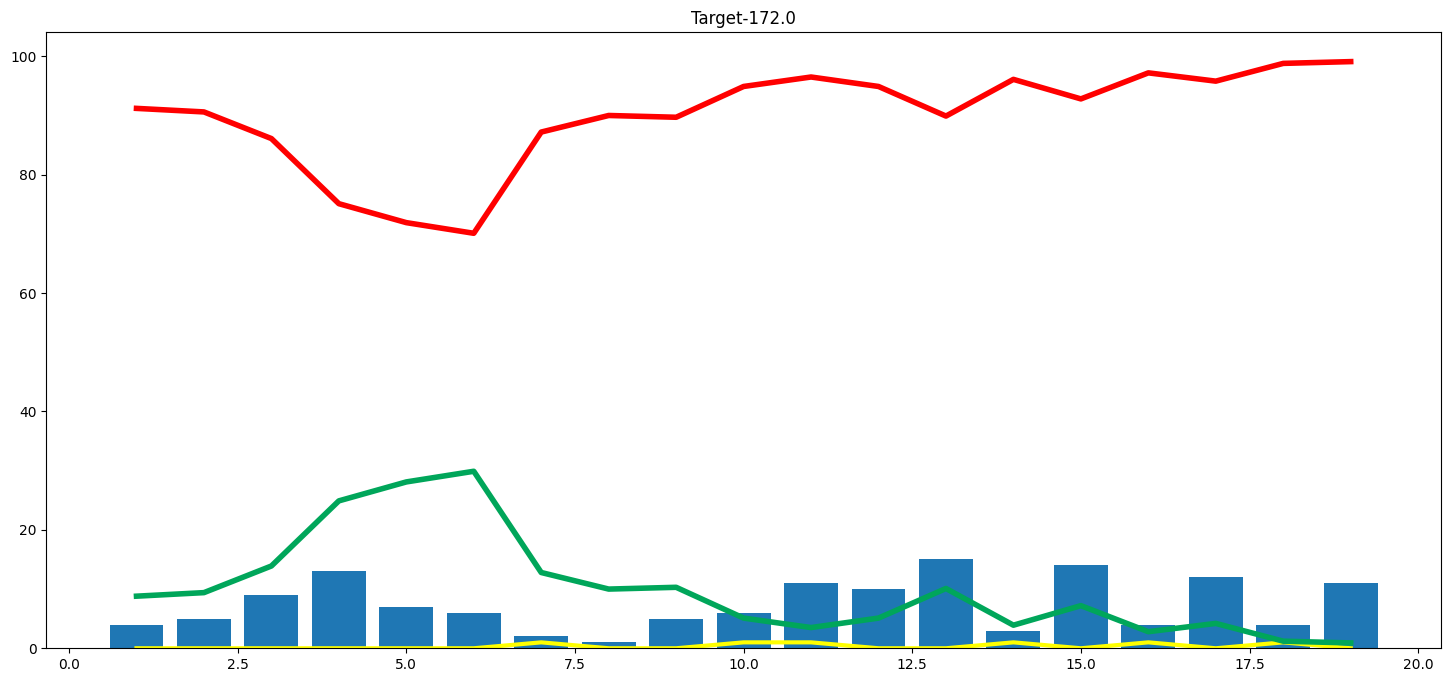

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))


In [62]:

teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [63]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur'], dtype=object)

In [64]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [65]:
final_data

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,119,10,207.0,6.000000,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,118,10,207.0,3.000000,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,117,10,207.0,2.000000,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205.0,116,10,207.0,4.500000,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201.0,115,10,207.0,8.400000,10.486957,0
...,...,...,...,...,...,...,...,...,...,...
43992,Kings XI Punjab,Delhi Daredevils,Delhi,26.0,33,8,111.0,5.931034,4.727273,1
43993,Kings XI Punjab,Delhi Daredevils,Delhi,25.0,32,8,111.0,5.931818,4.687500,1
43994,Kings XI Punjab,Delhi Daredevils,Delhi,24.0,31,8,111.0,5.932584,4.645161,1
43995,Kings XI Punjab,Delhi Daredevils,Delhi,24.0,30,8,111.0,5.866667,4.800000,1
